# 911 Calls Project

For this project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:


|Features|Description|
|-----|-----|
|lat|Latitude|
|lng|Longitude|
|desc|Description of the Emergency Call|
|zip|Zipcode|
|title|Title|
|timeStamp|YYYY-MM-DD HH:MM:SS|
|twp|Township|
|addr|Address|
|e|Dummy variable (always 1)|

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('seaborn-poster')
style.use('ggplot')
%matplotlib inline

# To print multiple outputs together
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Change column display number during print
pd.set_option('display.max_columns', 500)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# To display float with 2 decimal, avoid scientific printing
pd.options.display.float_format = '{:.2f}'.format

## Data and Setup

In [3]:
df = pd.read_csv('911.csv')
df.head()
df.info()
df.describe()
df.drop('e', axis=1, inplace=True)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.30,-75.58,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.00,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.26,-75.26,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.00,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.12,-75.35,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.00,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.12,-75.34,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.00,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.25,-75.60,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,nan,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


,lat,lng,zip,e
count,99492.00,99492.00,86637.00,99492.00
mean,40.16,-75.32,19237.66,1.00
std,0.09,0.17,345.34,0.00
min,30.33,-95.60,17752.00,1.00
25%,40.10,-75.39,19038.00,1.00
50%,40.15,-75.30,19401.00,1.00
75%,40.23,-75.21,19446.00,1.00
max,41.17,-75.00,77316.00,1.00


### Observations
- Timestamp should be a **Datetime** data type.
- 'e' column can be **dropped** as it has no variance.
- Zip column contains lot of **missing** values.

## EDA

**The top 5 zipcodes for 911 calls**

In [33]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

**The top 5 townships (twp) for 911 calls**

In [39]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

**Number of unique title codes in the 'title' column**

In [40]:
df['title'].nunique()

110

**In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Seperate Reasons form Departments** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS.**

In [134]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])
df['Department'] = df['title'].apply(lambda x: x.split(':')[1])

**The most common Reason for a 911 call**

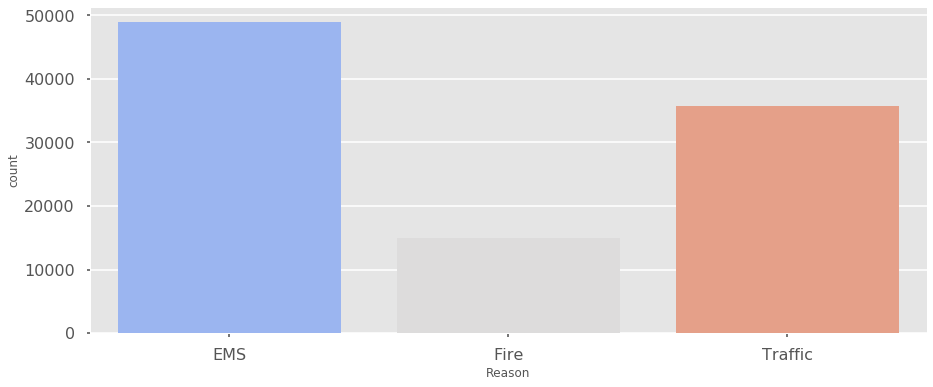

In [12]:
plt.figure(figsize=(15,6));
sns.countplot(x=df['Reason'], data = df, palette = 'coolwarm');

### Observations
- **EMS** seems to be the most common reason for an emergency call.

**Frequency of 911 calls from different departments**

In [135]:
df.loc[df['Department'].str.contains('VEHICLE ACCIDENT'), 'Department'] = ' VEHICLE ACCIDENT'
df['Department'].value_counts(normalize=True).head()

 VEHICLE ACCIDENT        0.29
 DISABLED VEHICLE -      0.08
 FIRE ALARM              0.06
 RESPIRATORY EMERGENCY   0.05
 CARDIAC EMERGENCY       0.05
Name: Department, dtype: float64

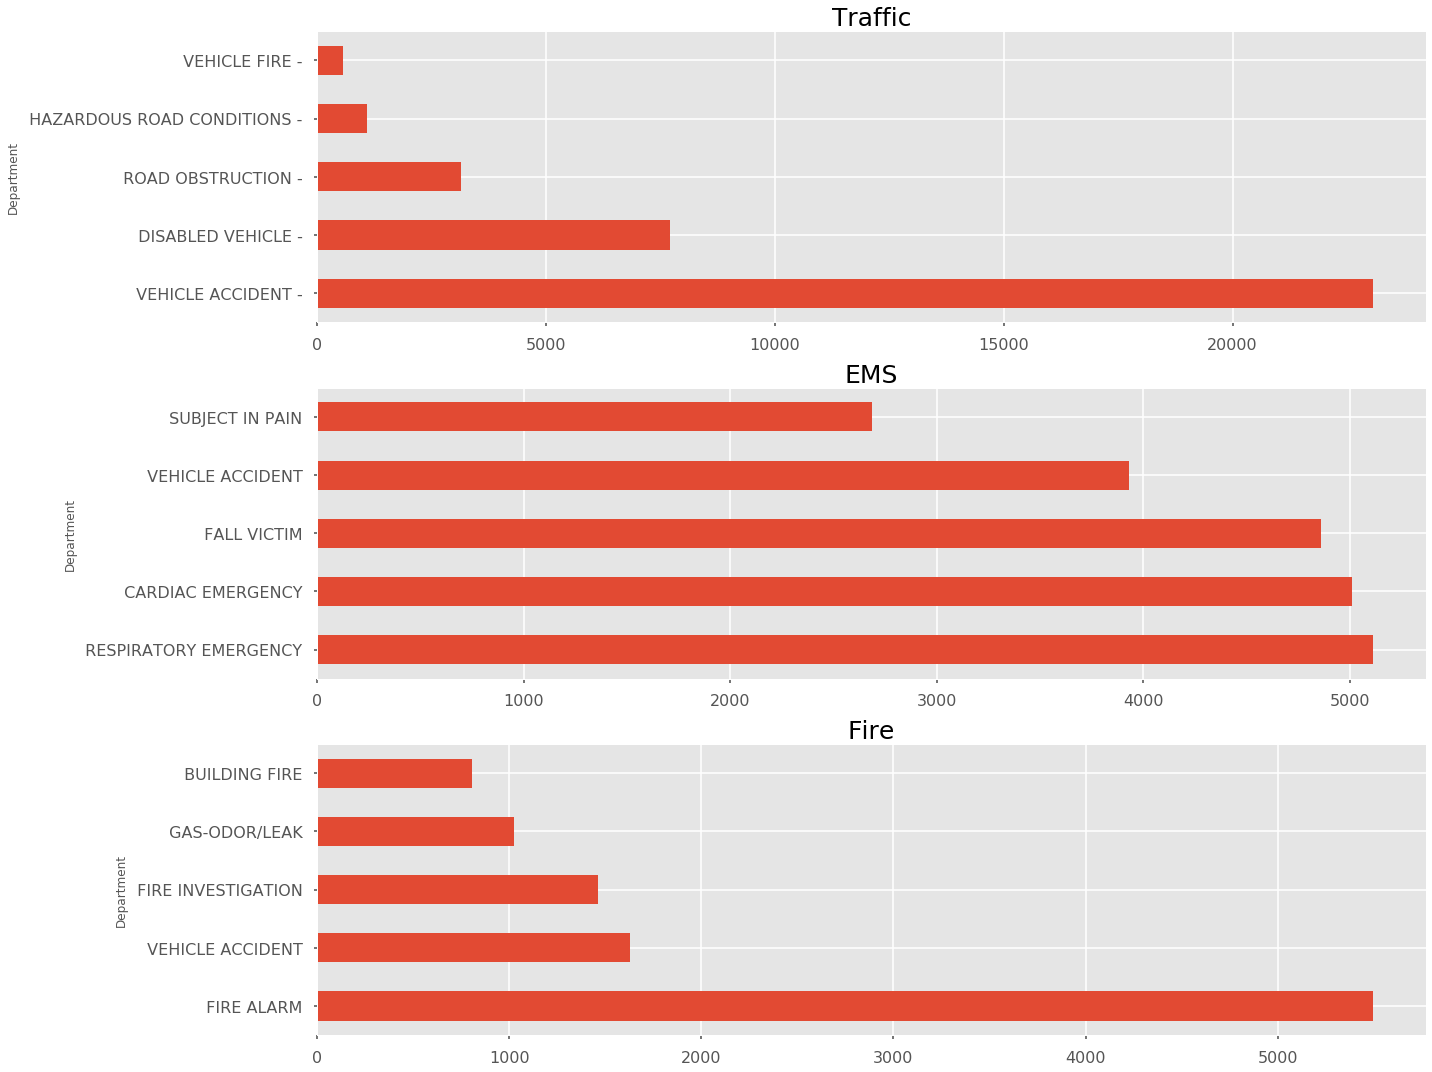

In [110]:
fig, ax = plt.subplots(3,1,figsize=(20,15));
(df[df['Reason']=='Traffic'].groupby('Department').count().sort_values(by=['twp'],ascending=False)['twp'].head()).plot(kind='barh', ax=ax[0])
ax[0].set_title('Traffic', fontsize=25);
(df[df['Reason']=='EMS'].groupby('Department').count().sort_values(by=['twp'],ascending=False)['twp'].head()).plot(kind='barh', ax=ax[1])
ax[1].set_title('EMS', fontsize=25);
(df[df['Reason']=='Fire'].groupby('Department').count().sort_values(by=['twp'],ascending=False)['twp'].head()).plot(kind='barh', ax=ax[2])
ax[2].set_title('Fire', fontsize=25);
plt.tight_layout();

### Observations:
- Even though most of the calls are due to EMS reasons, **Vehicle Accidents** amount to about **29%** of the total 911 calls as it contributes to both 'Traffic' and 'Fire' reasons.
- **Respiratory** and **Cardiac** emergencies are the top two reasons for EMS calls.
- **Setting off a Fire alarm** amounts to most of the 911 calls due to 'Fire' reason.

**Convert columns from string to DateTime objects**

In [14]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['Day of Week'] = df['timeStamp'].apply(lambda x: x.dayofweek)
df['Day of Month'] = df['timeStamp'].apply(lambda x: x.day)

## Mapping the actual string names to the day of the week:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)

**911 calls per Day:**

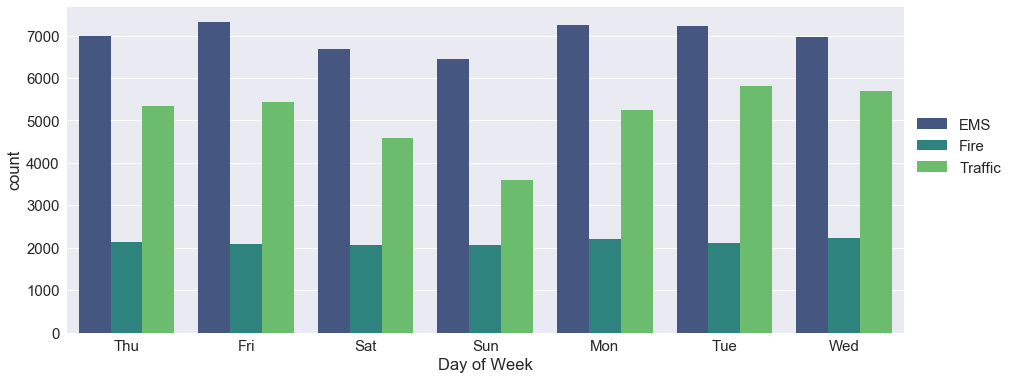

In [71]:
plt.figure(figsize=(15,6))
sns.countplot(x = df['Day of Week'], data = df, hue = df['Reason'], palette = 'viridis')
plt.legend(bbox_to_anchor = (1,0.7))

### Observations:
- Call count seem to be **uniformly distributed** among the days of the week.

**911 calls per Month:**

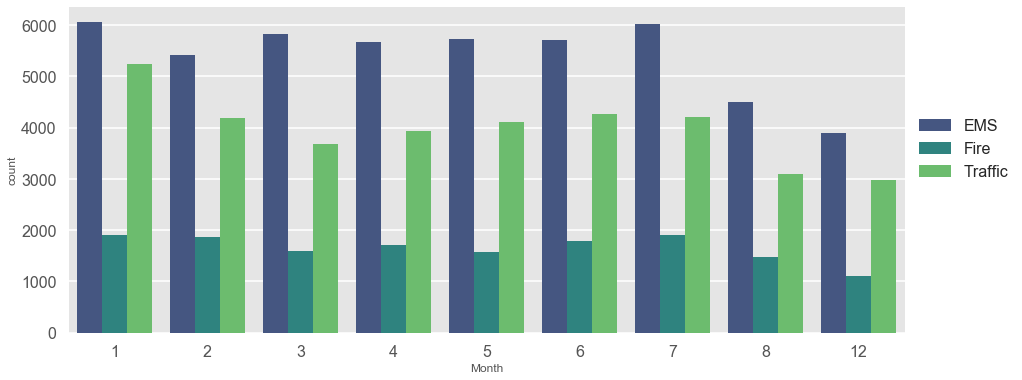

In [74]:
plt.figure(figsize=(15,6))
sns.countplot(x = df['Month'], data = df, hue = df['Reason'], palette = 'viridis')
plt.legend(bbox_to_anchor = (1,0.7))

### Observations:
- **January** followed by **July** have the highest number of calls.
- It is **missing** some months! 9,10, and 11 are not there.

**There seem to be some missing Months, to fill in this information in another way, a simple line plot can be used**

In [78]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


** A simple plot off of the dataframe indicating the count of calls per month. **

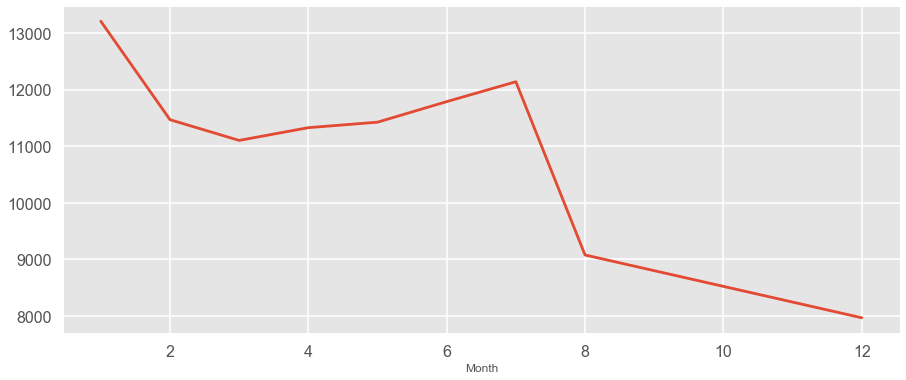

In [79]:
plt.figure(figsize=(15,6))
byMonth['lat'].plot()

We have filled in the missing months through a fit between month 8 and month 12

### Observations:
- Number of calls gradually **decrease** after a peak at **July**.

**Three separate plots with each plot representing the frequency of a 911 call for a particular reason.**

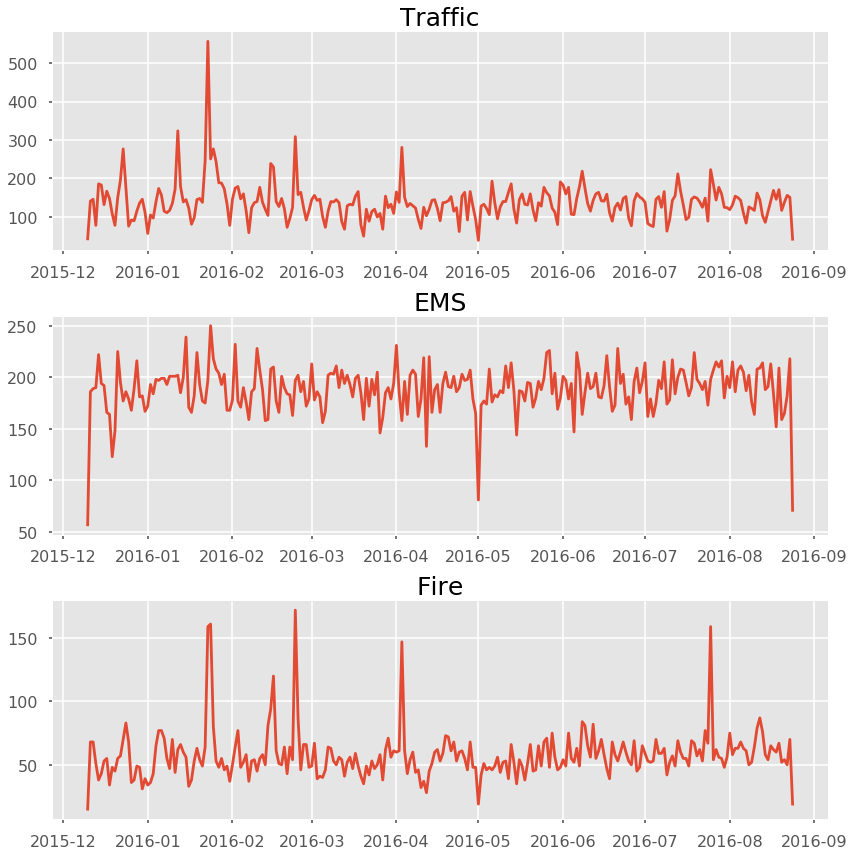

In [29]:
df['Date']=df['timeStamp'].apply(lambda x: x.date())

fig, ax = plt.subplots(3,1,figsize=(12,12));
ax[0].plot(df[df['Reason']=='Traffic'].groupby('Date').count()['twp']);
ax[0].set_title('Traffic', fontsize=25);
ax[1].plot(df[df['Reason']=='EMS'].groupby('Date').count()['twp']);
ax[1].set_title('EMS', fontsize=25);
ax[2].plot(df[df['Reason']=='Fire'].groupby('Date').count()['twp']);
ax[2].set_title('Fire', fontsize=25);
plt.tight_layout();

**During what hours of a week during what days of the week a 911 call occurs**

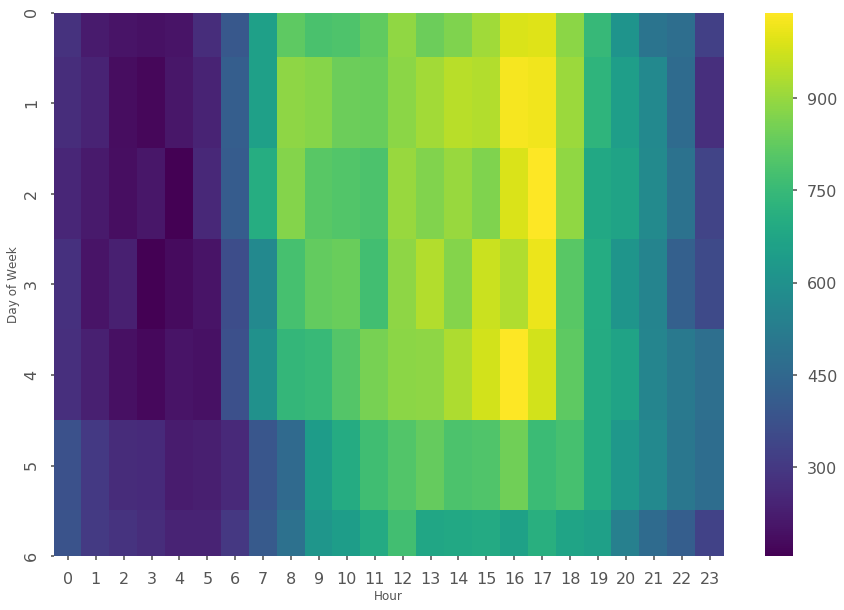

In [39]:
dayHour = df.groupby(['Day of Week','Hour']).Reason.count().unstack()

plt.figure(figsize =(15,10));
sns.heatmap(dayHour, cmap = 'viridis');

### Observations:
- **Majority** of the calls are recieved during **daytime** around 7am to evening 7pm in most days of the week. However the frequency of calls are comparetively **less** on **weekends**.

**For 911 calls during a day per month**

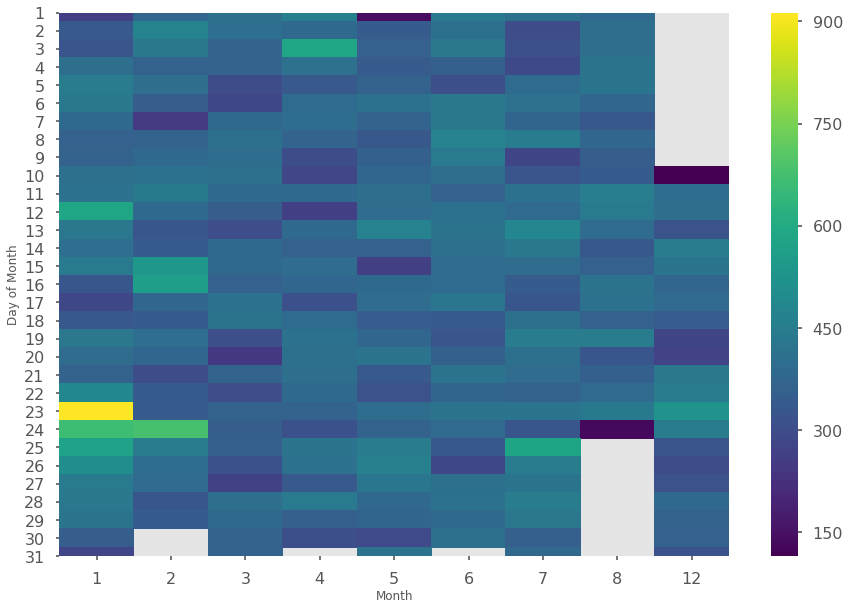

In [45]:
dayMonth = df.groupby(['Day of Month','Month'])['Reason'].count().unstack()
plt.figure(figsize=(15,10));
sns.heatmap(dayMonth,cmap='viridis');

### Observations:
- On **Jan 23**, there was a major **increase** in the number of calls.

**Let's investigate why**

In [133]:
df[(df['Day of Month'] == 23)&(df['Month'] == 1)]['Reason'].value_counts()

Traffic    557
EMS        197
Fire       159
Name: Reason, dtype: int64

### Observations:
- Surprisingly, there were **557** calls due to **Traffic** reasons.